In [1]:
import tensorflow
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:


health_data =  pd.read_csv('../merged_final_data_clean.csv')

In [3]:
print(health_data.columns)

Index(['TIME', 'PATIENT', 'Age', 'Gender', 'Race', 'Triglycerides',
       'How many family members  including yourself  do you currently live with?',
       'Hemoglobin [Mass/volume] in Blood', 'Body Mass Index',
       'Low Density Lipoprotein Cholesterol', 'Calcium', 'Are you a refugee?',
       'In the past year  have you or any family members you live with been unable to get any of the following when it was really needed?',
       'Total Cholesterol',
       'Stress is when someone feels tense  nervous  anxious or can't sleep at night because their mind is troubled. How stressed are you?',
       'High Density Lipoprotein Cholesterol', 'Carbon Dioxide',
       'Are you worried about losing your housing?',
       'Platelets [#/volume] in Blood by Automated count', 'Body Height',
       'How often do you see or talk to people that you care about and feel close to (For example: talking to friends on the phone  visiting friends or family  going to church or club meetings)?',
       'C

In [4]:
columns_to_encode = ['Tobacco smoking status NHIS',  
                    "Stress is when someone feels tense  nervous  anxious or can't sleep at night because their mind is troubled. How stressed are you?", 
                     "Are you a refugee?", 
                     "In the past year  have you or any family members you live with been unable to get any of the following when it was really needed?",
                     "Are you worried about losing your housing?",
                     "What is your main insurance?",
                     "In the past year  have you spent more than 2 nights in a row in a jail  prison  detention center  or juvenile correctional facility?",
                     "What is your current work situation?",
                     "Are you Hispanic or Latino?",
                     "Do you feel physically and emotionally safe where you currently live?",
                     "What is the highest level of school that you have finished?",
                     "Which race(s) are you?",
                     "In the past year  have you been afraid of your partner or ex-partner?",
                     "Has lack of transportation kept you from medical appointments  meetings  work  or from getting things needed for daily living?",
                     "What is your housing situation today?",
                     "Tobacco smoking status NHIS",
                     "At any point in the past 2 years  has season or migrant farm work been your or your family's main source of income?",
                     "Have you been discharged from the armed forces of the United States?",
                    "Gender", 
                     "Race",
                    "How often do you see or talk to people that you care about and feel close to (For example: talking to friends on the phone  visiting friends or family  going to church or club meetings)?"]

OHE    = OneHotEncoder(sparse=False)
encoded_columns =    OHE.fit_transform(health_data[columns_to_encode])
                     
                     

In [5]:
print(encoded_columns.shape)

(3585, 80)


In [6]:
only_scalar = health_data.drop(columns_to_encode, axis=1).values


In [7]:
print(only_scalar)

[['2008-09-26' '0003a94b-ff6d-f3e0-6ae6-79e07c897c7a' 59 ... 107.0 70.0 0]
 ['2021-07-04' '0014944d-3b3c-b330-0908-cdb7baff589c' 36 ... 127.0 81.0 0]
 ['2021-08-25' '001f6494-0eb7-d400-743b-c9227ddd0e7a' 57 ... 122.0 85.0 0]
 ...
 ['2013-07-19' 'fb04ca3b-b31e-2328-9d88-d4871e896f43' 35 ... 132.0 86.0 1]
 ['2014-07-01' 'fb13fe03-4236-d153-48ca-11e1021ad534' 32 ... 102.0 75.0 1]
 ['2013-09-24' 'fbe243fa-bb90-68d2-f77f-af9af6a32336' 50 ... 120.0 79.0 1]]


In [27]:
only_scalar_filtered =only_scalar[:,2:-3] #filter time and patient AND DIASTALIC AND SYSTOLIC
labels =only_scalar[:,-1]
labels = np.expand_dims(labels, axis=-1)

only_scalar_filtered = np.concatenate([only_scalar_filtered, labels], axis=1)

print(only_scalar_filtered)

[[59 127.7 6.0 ... 92.5 63.0 0]
 [36 128.6 4.0 ... 89.8 86.0 0]
 [57 103.1 2.0 ... 82.4 80.0 0]
 ...
 [35 153.7 6.0 ... 82.5 79.0 1]
 [32 136.9 1.0 ... 69.5 80.0 1]
 [50 124.7 8.0 ... 92.7 97.0 1]]


In [28]:
processed_data = np.concatenate([only_scalar_filtered, encoded_columns], axis=1)

In [29]:
print(processed_data.shape)

(3585, 107)


Shuffle the dataset.

In [30]:
from sklearn.utils import shuffle

processed_data = shuffle(processed_data)

In [31]:
X = processed_data[:,:-1].astype(float)
y = processed_data[:,-1].astype(int)

Split the data into train and test set. 18% of it preserved for test set, and remaining 72% for train set.

In [32]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [34]:
X_train[0].shape[0]

106

In [36]:
print(X_train.dtype)

float64


In [38]:
print(y_train)

[0 0 0 ... 1 1 0]


Fully connected neural network model with 3 hidden layers:

In [55]:
import tensorflow as tf 

model = tf.keras.models.Sequential([
  tf.keras.Input(shape=(X_train[0].shape[0],)), #Xtrain[0].shape[0] = 104
  tf.keras.layers.Dense(15, activation='relu'), #represents 1st hidden layer 
  tf.keras.layers.Dropout(0.2), # dropout regularization with dropout probability 20% percent
  tf.keras.layers.Dense(7, activation='relu'), #represents the 2nd hidden layer 
  tf.keras.layers.Dropout(0.2), # dropout regularization with dropout probability 20% percent
  tf.keras.layers.Dense(4, activation='relu'), #represents the 3rd hidden layer 
  tf.keras.layers.Dropout(0.2), # dropout regularization with dropout probability 20% percent
  tf.keras.layers.Dense(1, activation='sigmoid') # sigmoid activation at output since it is binary classification
])

In [56]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

Train the model with 10 epochs:

In [57]:
r2 = model.fit(X_train, y_train, epochs=150)

Epoch 1/150
101/101 [==============================] - 1s 890us/step - loss: 19911.3032 - accuracy: 0.1746
Epoch 2/150
101/101 [==============================] - 0s 910us/step - loss: 2116.1180 - accuracy: 0.5821
Epoch 3/150
101/101 [==============================] - 0s 1ms/step - loss: 746.0180 - accuracy: 0.7824
Epoch 4/150
101/101 [==============================] - 0s 840us/step - loss: 475.4041 - accuracy: 0.8253
Epoch 5/150
101/101 [==============================] - 0s 820us/step - loss: 300.5241 - accuracy: 0.8459
Epoch 6/150
101/101 [==============================] - 0s 980us/step - loss: 245.9800 - accuracy: 0.8524
Epoch 7/150
101/101 [==============================] - 0s 930us/step - loss: 189.8506 - accuracy: 0.8586
Epoch 8/150
101/101 [==============================] - 0s 1ms/step - loss: 187.2163 - accuracy: 0.8644
Epoch 9/150
101/101 [==============================] - 0s 1ms/step - loss: 165.6396 - accuracy: 0.8763
Epoch 10/150
101/101 [==============================] - 0s

Epoch 80/150
101/101 [==============================] - 0s 900us/step - loss: 0.3284 - accuracy: 0.9096
Epoch 81/150
101/101 [==============================] - 0s 900us/step - loss: 0.3040 - accuracy: 0.9170
Epoch 82/150
101/101 [==============================] - 0s 853us/step - loss: 0.3064 - accuracy: 0.9140
Epoch 83/150
101/101 [==============================] - 0s 887us/step - loss: 0.3116 - accuracy: 0.9115
Epoch 84/150
101/101 [==============================] - 0s 842us/step - loss: 0.3090 - accuracy: 0.9107
Epoch 85/150
101/101 [==============================] - 0s 803us/step - loss: 0.3085 - accuracy: 0.9124
Epoch 86/150
101/101 [==============================] - 0s 853us/step - loss: 0.3290 - accuracy: 0.9043
Epoch 87/150
101/101 [==============================] - 0s 890us/step - loss: 0.3336 - accuracy: 0.8984
Epoch 88/150
101/101 [==============================] - 0s 883us/step - loss: 0.3132 - accuracy: 0.9071
Epoch 89/150
101/101 [==============================] - 0s 910us

Plot the losses:

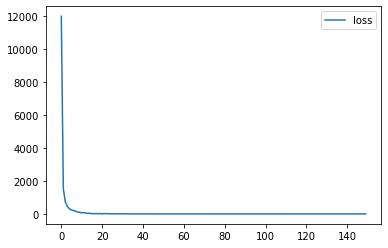

In [58]:
plt.plot(r2.history['loss'], label='loss')
#plt.plot(r2.history['val_loss'], label='val_loss')
plt.legend()

Plot the accuracies:

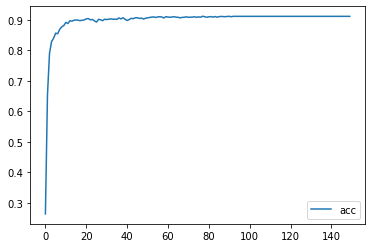

In [59]:
plt.plot(r2.history['accuracy'], label='acc')
#plt.plot(r2.history['val_accuracy'], label='val_acc')
plt.legend()

In [60]:
print(model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 818us/step - loss: 0.2681 - accuracy: 0.9248
[0.26807019114494324, 0.9247910976409912]


In [62]:
model.save_weights('./weights/model_full/')

**Applying this dataset on different models to create benchmarks to compare with Fully Connected model:**

*Logistic Regression* **(linear classifier):**

In [46]:
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test,y_test))



0.9113453192808432
0.924791086350975


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
for i in range(X_train[0].shape[0]):
 print("weight for the feature",i,":",model.coef_[0][i])

model.coef_[0].sort()

print("sorted list, positive weights contribute MORE TO DETERMINE potential hypertension case and negative features conribute more to make prediction as NOT hypertension. So we can say 0 valued weights do not contribute to anything:",model.coef_[0])

weight for the feature 0 : -0.001269072069105969
weight for the feature 1 : -0.001912998093316698
weight for the feature 2 : 0.0021300703994232392
weight for the feature 3 : 0.008678357639568106
weight for the feature 4 : 0.004297028507627697
weight for the feature 5 : -0.013368846962379723
weight for the feature 6 : -0.003938173393702886
weight for the feature 7 : 0.008190261014102238
weight for the feature 8 : -0.006175514618128337
weight for the feature 9 : -0.002315577506692285
weight for the feature 10 : -0.0006153388168114538
weight for the feature 11 : -0.013036858065776865
weight for the feature 12 : -0.005181563397706072
weight for the feature 13 : -4.3683729383293066e-07
weight for the feature 14 : -0.008780364879894267
weight for the feature 15 : -0.01166293116274796
weight for the feature 16 : -0.002427192807723251
weight for the feature 17 : -0.0010810258876364372
weight for the feature 18 : 0.0008874175115078015
weight for the feature 19 : -0.0019423972322216313
weight fo

*Decision Tree*  

In [48]:
from sklearn.tree import DecisionTreeClassifier
model =DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test,y_test))

1.0
1.0


*AdaBoost*

In [49]:
from sklearn.ensemble import AdaBoostClassifier
model =AdaBoostClassifier()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test,y_test))

1.0
1.0


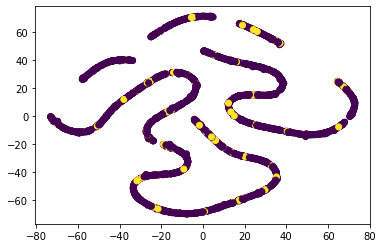

In [51]:
# Visualize the data (tsne is great but slow.)

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
transformed = tsne.fit_transform(X_train)

#visualize in the 2d
plt.scatter(transformed[:,0], transformed[:,1], c=y_train) #take first two columns in order to get 2d plot.
plt.show()

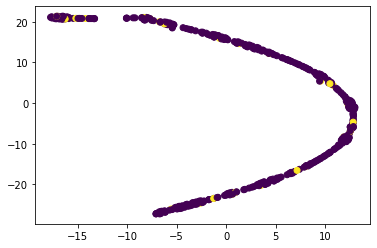

In [52]:
transformed = tsne.fit_transform(X_test)

# visualize the clouds in 2-D
plt.scatter(transformed[:,0], transformed[:,1], c=y_test) #take first two columns in order to get 2d plot.
plt.show()